# Fashion MNIST Dataset Exploration

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms
import sys

from torch.utils.data import DataLoader
from fashionmnist_dataset import FashionMNISTDataset

# Image display
import matplotlib.pyplot as plt

In [2]:
# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

In [3]:
# Create datasets for training & validation, download if necessary
custom_data_root = './'
train_dataset = torchvision.datasets.FashionMNIST(root=custom_data_root, train=True, transform=transform, download=False)
validate_dataset = torchvision.datasets.FashionMNIST(root=custom_data_root, train=False, transform=transform, download=False)

In [4]:
# Create DataLoaders for the datasets
print("Creating DataLoaders for training and validation datasets...")
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validate_dataloader = DataLoader(validate_dataset, batch_size=batch_size, shuffle=False)

Creating DataLoaders for training and validation datasets...


In [5]:
# First, grab a single mini-batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# print the shape of images and labels
print(images.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


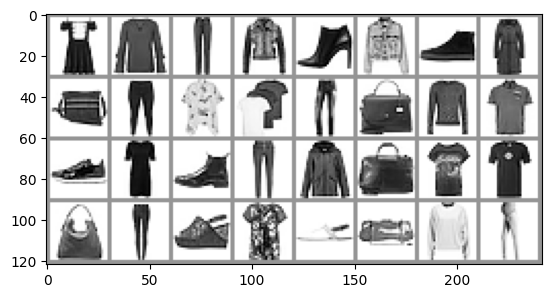

In [6]:
# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Create a grid from the batch of images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)